In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df=pd.read_csv('accidents-1.csv')

In [4]:
df.head()

,RushHour,WRK_ZONE,WKDY,INT_HWY,LGTCON_day,LEVEL,SPD_LIM,SUR_COND_dry,TRAF_two_way,WEATHER_adverse,MAX_SEV
0,1,0,1,1,0,1,70,0,0,1,NOT_SEVERE
1,1,0,1,0,0,0,55,0,1,0,SEVERE
2,1,0,0,0,0,0,35,0,0,1,NOT_SEVERE
3,1,0,1,0,0,1,35,0,0,1,NOT_SEVERE
4,1,0,1,0,0,0,25,0,0,1,SEVERE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
RushHour           600 non-null int64
WRK_ZONE           600 non-null int64
WKDY               600 non-null int64
INT_HWY            600 non-null int64
LGTCON_day         600 non-null int64
LEVEL              600 non-null int64
SPD_LIM            600 non-null int64
SUR_COND_dry       600 non-null int64
TRAF_two_way       600 non-null int64
WEATHER_adverse    600 non-null int64
MAX_SEV            600 non-null object
dtypes: int64(10), object(1)
memory usage: 51.6+ KB


In [6]:
df.isnull().sum()

RushHour           0
WRK_ZONE           0
WKDY               0
INT_HWY            0
LGTCON_day         0
LEVEL              0
SPD_LIM            0
SUR_COND_dry       0
TRAF_two_way       0
WEATHER_adverse    0
MAX_SEV            0
dtype: int64

In [7]:
df['MAX_SEV'] = df['MAX_SEV'] .astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
RushHour           600 non-null int64
WRK_ZONE           600 non-null int64
WKDY               600 non-null int64
INT_HWY            600 non-null int64
LGTCON_day         600 non-null int64
LEVEL              600 non-null int64
SPD_LIM            600 non-null int64
SUR_COND_dry       600 non-null int64
TRAF_two_way       600 non-null int64
WEATHER_adverse    600 non-null int64
MAX_SEV            600 non-null category
dtypes: category(1), int64(10)
memory usage: 47.6 KB


In [9]:

from sklearn.naive_bayes import GaussianNB



from sklearn.model_selection import train_test_split


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [10]:
df['MAX_SEV'].value_counts()

SEVERE        308
NOT_SEVERE    292
Name: MAX_SEV, dtype: int64

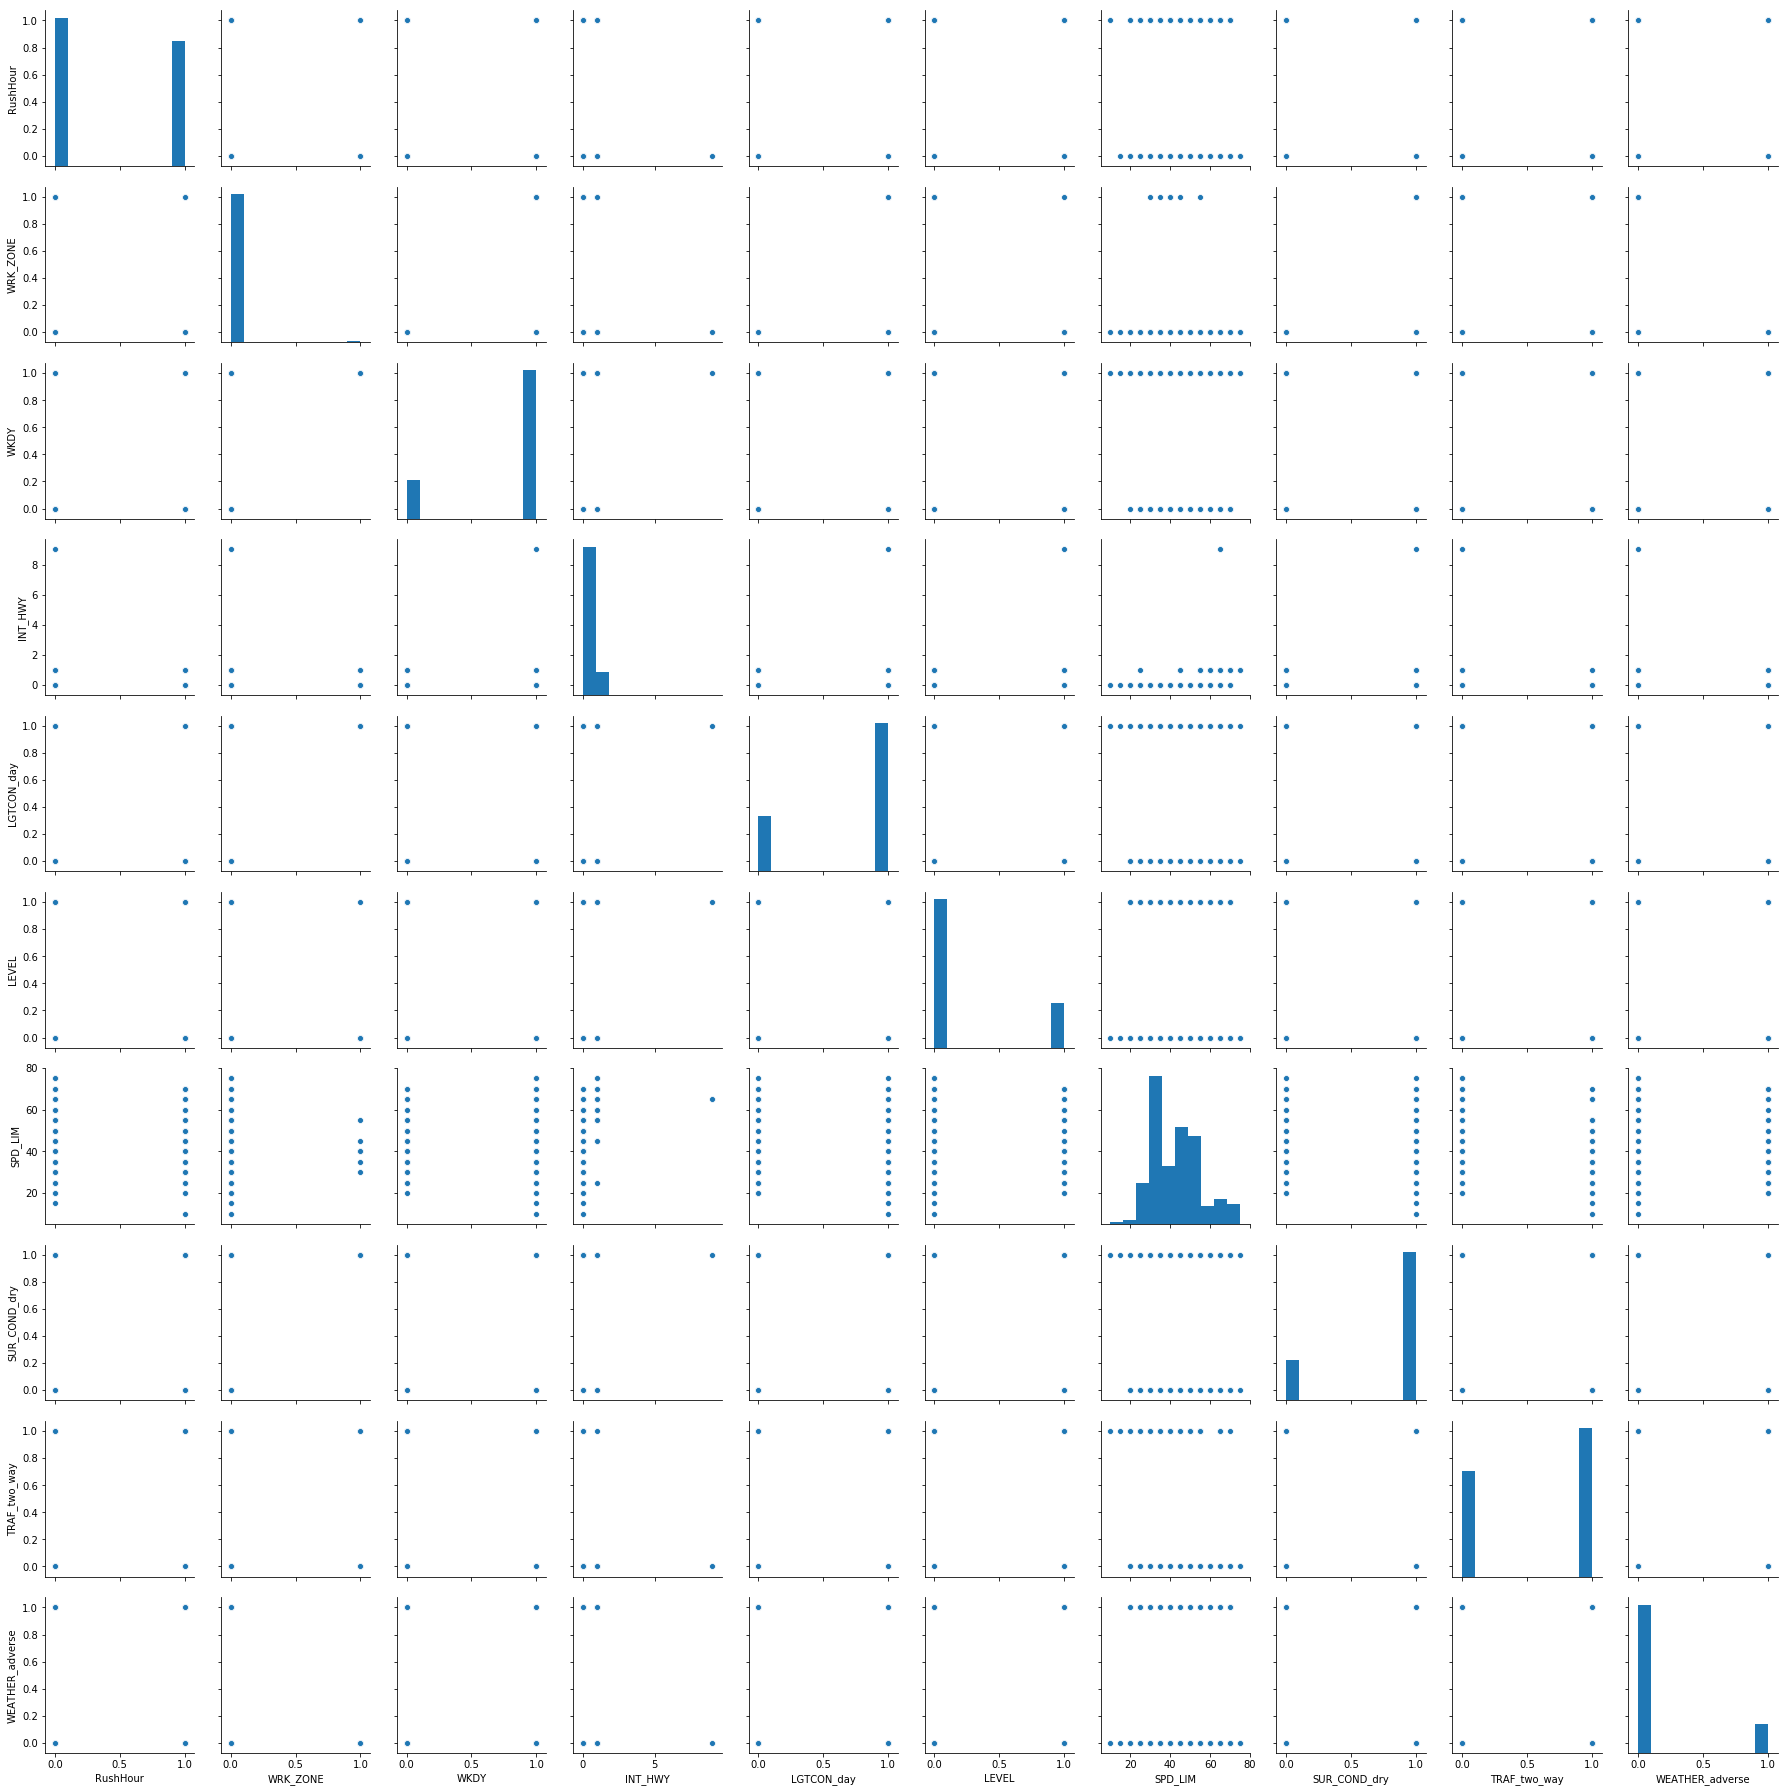

In [11]:
sns.pairplot(df)

In [12]:
# Putting feature variable to X
X = df.drop(['MAX_SEV'],axis=1)

# Putting response variable to y
y = df['MAX_SEV']

In [13]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [14]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

  NOT_SEVERE       0.45      0.75      0.56        79
      SEVERE       0.58      0.28      0.38       101

   micro avg       0.48      0.48      0.48       180
   macro avg       0.52      0.51      0.47       180
weighted avg       0.52      0.48      0.46       180

[[59 20]
 [73 28]]


In [16]:
predicted

array(['NOT_SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE',
       'SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE',
       'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
       'SEVERE', 'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE',
       'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
       'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
       'NOT_

In [17]:
from sklearn.naive_bayes import BernoulliNB

In [18]:

# fitting the model in the training data set
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

  NOT_SEVERE       0.43      0.32      0.36        79
      SEVERE       0.56      0.67      0.61       101

   micro avg       0.52      0.52      0.52       180
   macro avg       0.49      0.49      0.49       180
weighted avg       0.50      0.52      0.50       180

[[25 54]
 [33 68]]


In [20]:
predicted

array(['SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE',
       'SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE',
       'NOT_SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE',
       'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE',
       'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE',
       'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE',
       'SEVERE', 'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
       'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE',
       'NOT_SEVE

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
# fitting the model in the training data set
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

  NOT_SEVERE       0.45      0.35      0.40        79
      SEVERE       0.57      0.66      0.61       101

   micro avg       0.53      0.53      0.53       180
   macro avg       0.51      0.51      0.50       180
weighted avg       0.52      0.53      0.52       180

[[28 51]
 [34 67]]


In [24]:
predicted

array(['NOT_SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE',
       'SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE',
       'NOT_SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE',
       'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE',
       'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE',
       'SEVERE', 'SEVERE', 'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE',
       'NOT_SEVERE', 'NOT_SEVERE', 'SEVERE', 'NOT_SEVERE', 'NOT_SEVERE',
      

In [25]:
model.predict_proba(X_test)

array([[0.50388576, 0.49611424],
       [0.4965989 , 0.5034011 ],
       [0.46335276, 0.53664724],
       [0.4647218 , 0.5352782 ],
       [0.4954459 , 0.5045541 ],
       [0.48063539, 0.51936461],
       [0.48303164, 0.51696836],
       [0.47749378, 0.52250622],
       [0.48387922, 0.51612078],
       [0.50099349, 0.49900651],
       [0.50524258, 0.49475742],
       [0.46746145, 0.53253855],
       [0.48613389, 0.51386611],
       [0.57231248, 0.42768752],
       [0.49416799, 0.50583201],
       [0.47763353, 0.52236647],
       [0.49961733, 0.50038267],
       [0.49824118, 0.50175882],
       [0.49824118, 0.50175882],
       [0.49004056, 0.50995944],
       [0.47626029, 0.52373971],
       [0.47612058, 0.52387942],
       [0.49721679, 0.50278321],
       [0.47886732, 0.52113268],
       [0.51433003, 0.48566997],
       [0.47886732, 0.52113268],
       [0.47886732, 0.52113268],
       [0.48263729, 0.51736271],
       [0.49446467, 0.50553533],
       [0.47886732, 0.52113268],
       [0.